In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import tidyfinance as tf

from plotnine import *
from mizani.formatters import percent_format
from adjustText import adjust_text

In [3]:
vn30_symbols = [
    "ACB", "BCM", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG",
    "MBB", "MSN", "MWG", "PLX", "POW", "SAB", "SHB", "SSB", "STB", "TCB",
    "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE", "EIB"
]

In [4]:
import os
import boto3
from botocore.client import Config
from io import BytesIO

class ConnectMinio:
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")

        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        resp = self.s3.list_buckets()
        print("Connected. Buckets:")
        for b in resp.get("Buckets", []):
            print(" -", b["Name"])


conn = ConnectMinio()
s3 = conn.s3
conn.test_connection()

bucket_name = os.environ["MINIO_BUCKET"]

prices = pd.read_csv(
    BytesIO(
        s3.get_object(
            Bucket=bucket_name,
            Key="historycal_price/dataset_historical_price.csv"
        )["Body"].read()
    ),
    low_memory=False
)

Connected. Buckets:
 - dsteam-data
 - rawbctc


In [5]:
prices["date"] = pd.to_datetime(prices["date"])
prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]
prices = prices.rename(columns={
    "vol_total": "volume",
    "open_price": "open",
    "low_price": "low",
    "high_price": "high",
    "close_price": "close"
})
prices = prices.sort_values(["symbol", "date"])

In [6]:
prices_daily = prices[prices["symbol"].isin(vn30_symbols)]
prices_daily[["date", "symbol", "adjusted_close"]].head(3)

,date,symbol,adjusted_close
18176,2010-01-04,ACB,329.408244
18177,2010-01-05,ACB,329.408244
18178,2010-01-06,ACB,320.258015


In [7]:
returns_monthly = (prices_daily
    .assign(
        date=prices_daily["date"].dt.to_period("M").dt.to_timestamp("M")
    )
    .groupby(["symbol", "date"], as_index=False)
    .agg(adjusted_close=("adjusted_close", "last"))
    .sort_values(["symbol", "date"])
    .assign(
        ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change()
    )
)

returns_monthly.head(3)

,symbol,date,adjusted_close,ret
0,ACB,2010-01-31,291.975489,NaN
1,ACB,2010-02-28,303.621235,0.039886
2,ACB,2010-03-31,273.784658,-0.098269


In [8]:
all_dates = pd.date_range(
    start=returns_monthly["date"].min(), 
    end=returns_monthly["date"].max(), 
    freq="ME"
)

# Vietnam 10-Year Government Bond Yield (approximately 2.52% annualized)
rf_annual = 0.0252
rf_monthly_val = (1 + rf_annual)**(1/12) - 1

risk_free_monthly = pd.DataFrame({
    "date": all_dates,
    "risk_free": rf_monthly_val
})

risk_free_monthly["date"] = (
    pd.to_datetime(risk_free_monthly["date"])
    .dt.to_period("M")
    .dt.to_timestamp("M")
)

risk_free_monthly.head(3)

,date,risk_free
0,2010-01-31,0.002076
1,2010-02-28,0.002076
2,2010-03-31,0.002076


In [9]:
returns_monthly = returns_monthly.merge(
    risk_free_monthly[["date", "risk_free"]], 
    on="date", 
    how="left"
)

rf = risk_free_monthly["risk_free"].mean()

returns_monthly = (returns_monthly
    .assign(
        ret_excess=lambda x: x["ret"] - x["risk_free"]
    )
    .assign(
        ret_excess=lambda x: x["ret_excess"].clip(lower=-1)
    )
)

returns_monthly.head(3)

,symbol,date,adjusted_close,ret,risk_free,ret_excess
0,ACB,2010-01-31,291.975489,NaN,0.002076,NaN
1,ACB,2010-02-28,303.621235,0.039886,0.002076,0.037810
2,ACB,2010-03-31,273.784658,-0.098269,0.002076,-0.100345


In [10]:
assets = (returns_monthly
    .groupby("symbol", as_index=False)
    .agg(
        mu=("ret", "mean"),
        sigma=("ret", "std")
    )
)

sigma = (returns_monthly
    .pivot(index="date", columns="symbol", values="ret")
    .cov()
)

mu = (returns_monthly
    .groupby("symbol")["ret"]
    .mean()
    .values
)

In [11]:
# Compute tangency portfolio weights
w_tan = np.linalg.solve(sigma, mu - rf)
w_tan = w_tan / np.sum(w_tan)

# Portfolio performance metrics
mu_w = w_tan.T @ mu
sigma_w = np.sqrt(w_tan.T @ sigma @ w_tan)

efficient_portfolios = pd.DataFrame([
    {"symbol": r"$\omega_{\mathrm{tan}}$", "mu": mu_w, "sigma": sigma_w},
    {"symbol": r"$r_f$", "mu": rf, "sigma": 0}
])

sharpe_ratio = (mu_w - rf) / sigma_w

print(f"Tangency Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")
print(efficient_portfolios)

Tangency Portfolio Sharpe Ratio: -0.5552
                    symbol        mu     sigma
0  $\omega_{\mathrm{tan}}$ -0.041157  0.077866
1                    $r_f$  0.002076  0.000000


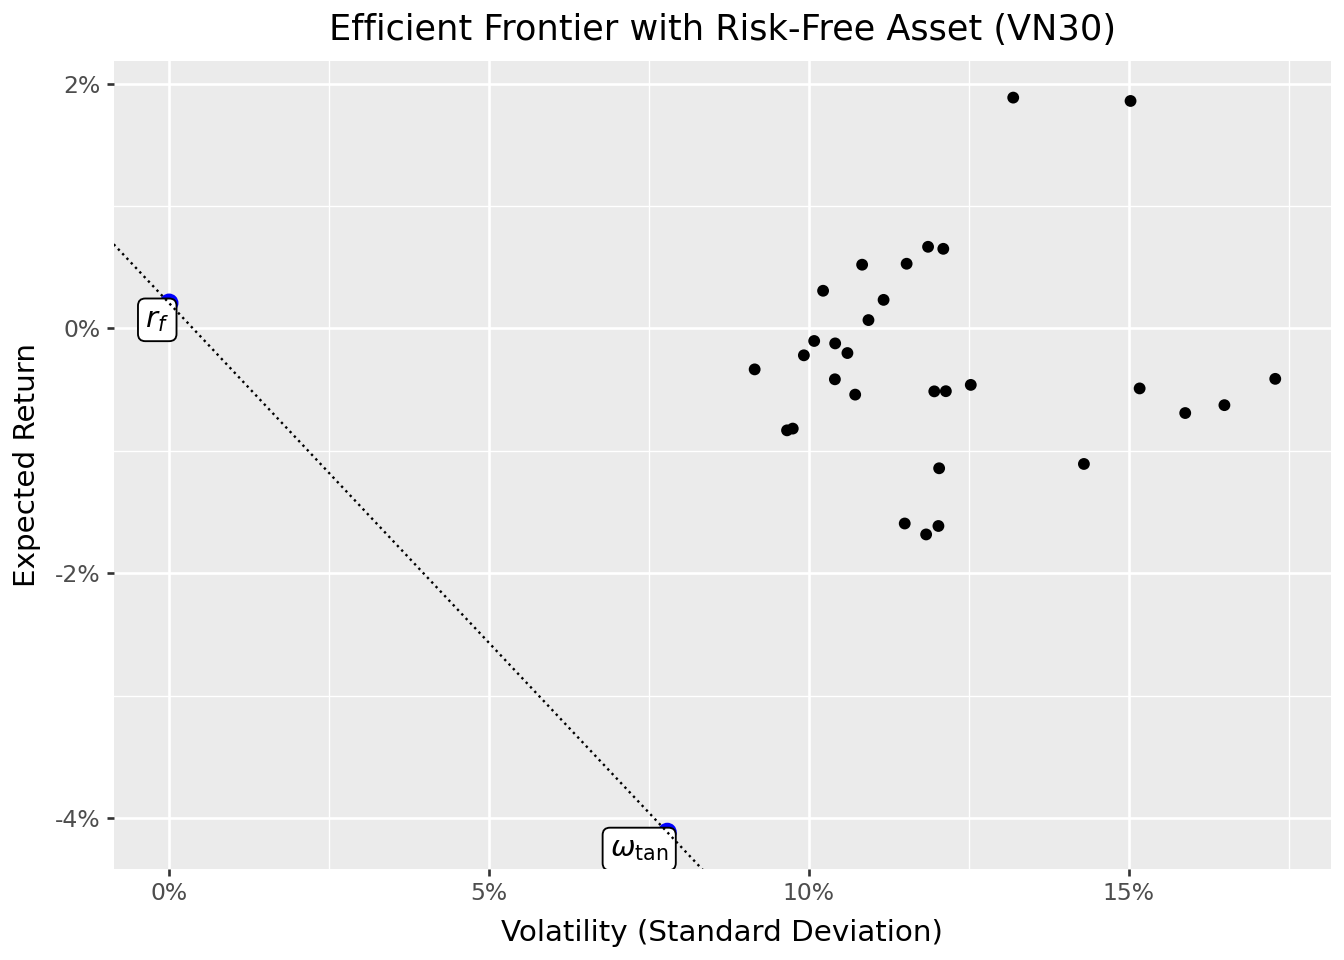

In [12]:
#| label: fig-300
#| fig-cap: The efficient frontier with a risk-free asset becomes a straight line (the Capital Market Line) connecting the risk-free rate to the tangency portfolio. Individual assets lie below this line, demonstrating the benefits of diversification.
#| fig-alt: 'Title: The efficient frontier with a risk-free asset and VN30 index constituents. The figure shows a scatter plot with volatilities on the horizontal axis and expected returns on the vertical axis. A dotted line represents the Capital Market Line.'

efficient_portfolios_figure = (
    ggplot(efficient_portfolios, aes(x="sigma", y="mu"))
    + geom_point(data=assets)
    + geom_point(data=efficient_portfolios, color="blue", size=3)
    + geom_label(
        aes(label="symbol"), 
        adjust_text={"arrowprops": {"arrowstyle": "-"}}
    )
    + scale_x_continuous(labels=percent_format())
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="Volatility (Standard Deviation)", 
        y="Expected Return",
        title="Efficient Frontier with Risk-Free Asset (VN30)"
    )
    + geom_abline(slope=sharpe_ratio, intercept=rf, linetype="dotted")
)

efficient_portfolios_figure.show()

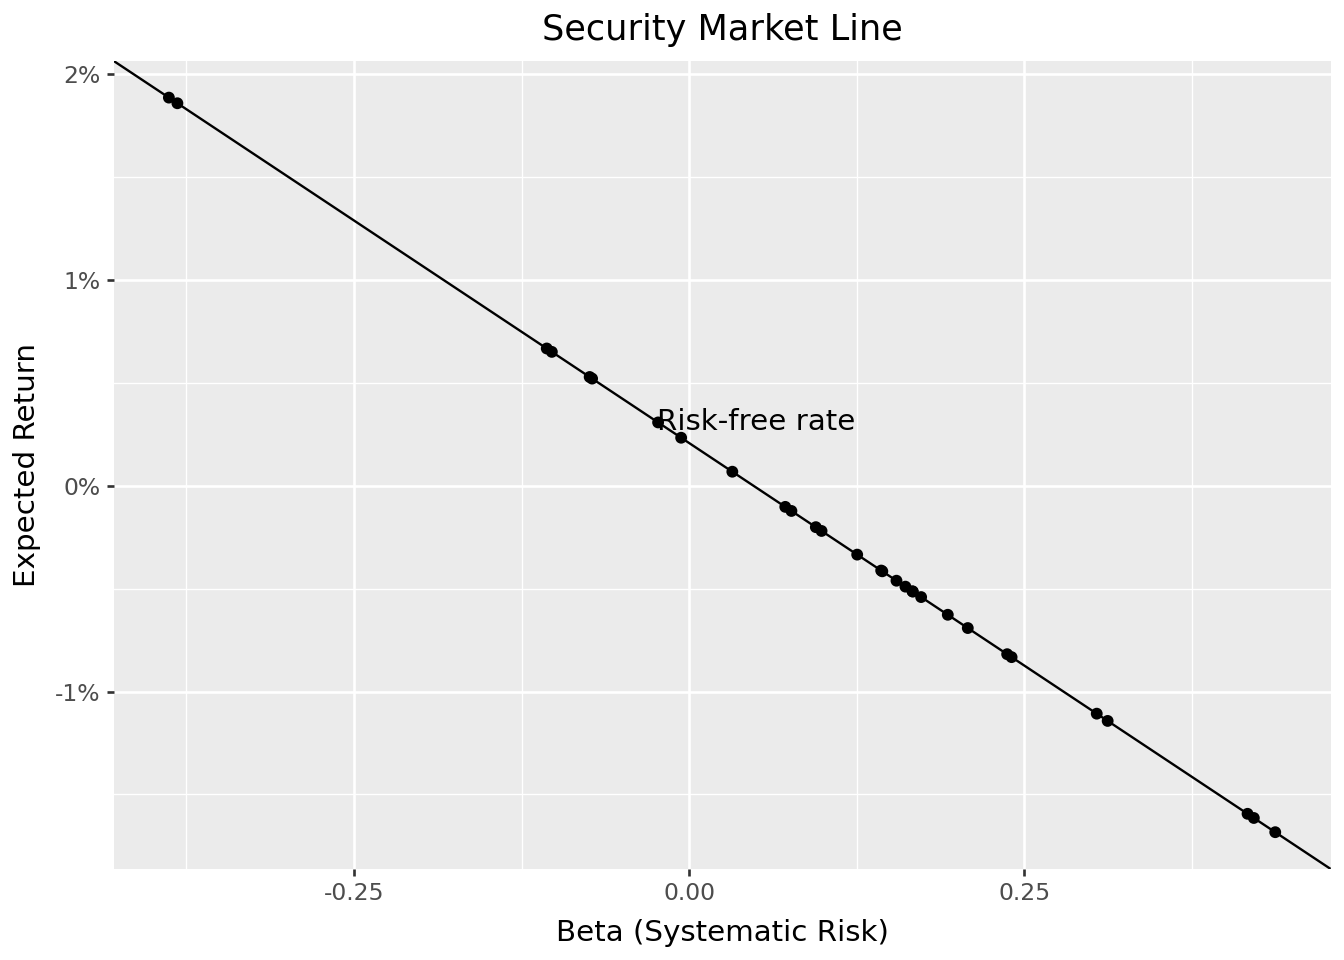

In [13]:
betas = (sigma @ w_tan) / (w_tan.T @ sigma @ w_tan)
assets["beta"] = betas.values

price_of_risk = float(w_tan.T @ mu - rf)

assets_figure = (
    ggplot(assets, aes(x="beta", y="mu"))
    + geom_point()
    + geom_abline(intercept=rf, slope=price_of_risk)
    + scale_y_continuous(labels=percent_format())
    + labs(
        x="Beta (Systematic Risk)", 
        y="Expected Return",
        title="Security Market Line"
    )
    + annotate("text", x=0.05, y=rf + 0.001, label="Risk-free rate")
)

assets_figure.show()

In [14]:
import sqlite3

tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

factors = pd.read_sql_query(
    sql="SELECT * FROM factors_ff5_monthly",
    con=tidy_finance,
    parse_dates={"date"}
)

factors.head(3)

,date,smb,hml,rmw,cma,mkt_excess
0,2011-07-31,0.008933,-0.013099,0.012139,-0.009529,-0.011287
1,2011-08-31,0.004830,-0.016656,0.014516,-0.003981,0.007856
2,2011-09-30,0.004970,-0.000462,0.008899,0.001241,-0.006501


In [15]:
import statsmodels.formula.api as smf

returns_excess_monthly = (returns_monthly
    .merge(factors, on="date", how="left")
    .assign(ret_excess=lambda x: x["ret"] - x["risk_free"])
)


def estimate_capm(data):
    model = smf.ols("ret_excess ~ mkt_excess", data=data).fit()
    result = pd.DataFrame({
        "coefficient": ["alpha", "beta"],
        "estimate": model.params.values,
        "t_statistic": model.tvalues.values
    })
    return result


capm_results = (returns_excess_monthly
    .groupby("symbol", group_keys=True)
    .apply(estimate_capm)
    .reset_index()
)

capm_results.head(4)

,symbol,level_1,coefficient,estimate,t_statistic
0,ACB,0,alpha,-0.007479,-0.876326
1,ACB,1,beta,-0.240019,-0.252484
2,BCM,0,alpha,0.027827,1.737895
3,BCM,1,beta,4.150186,2.625283


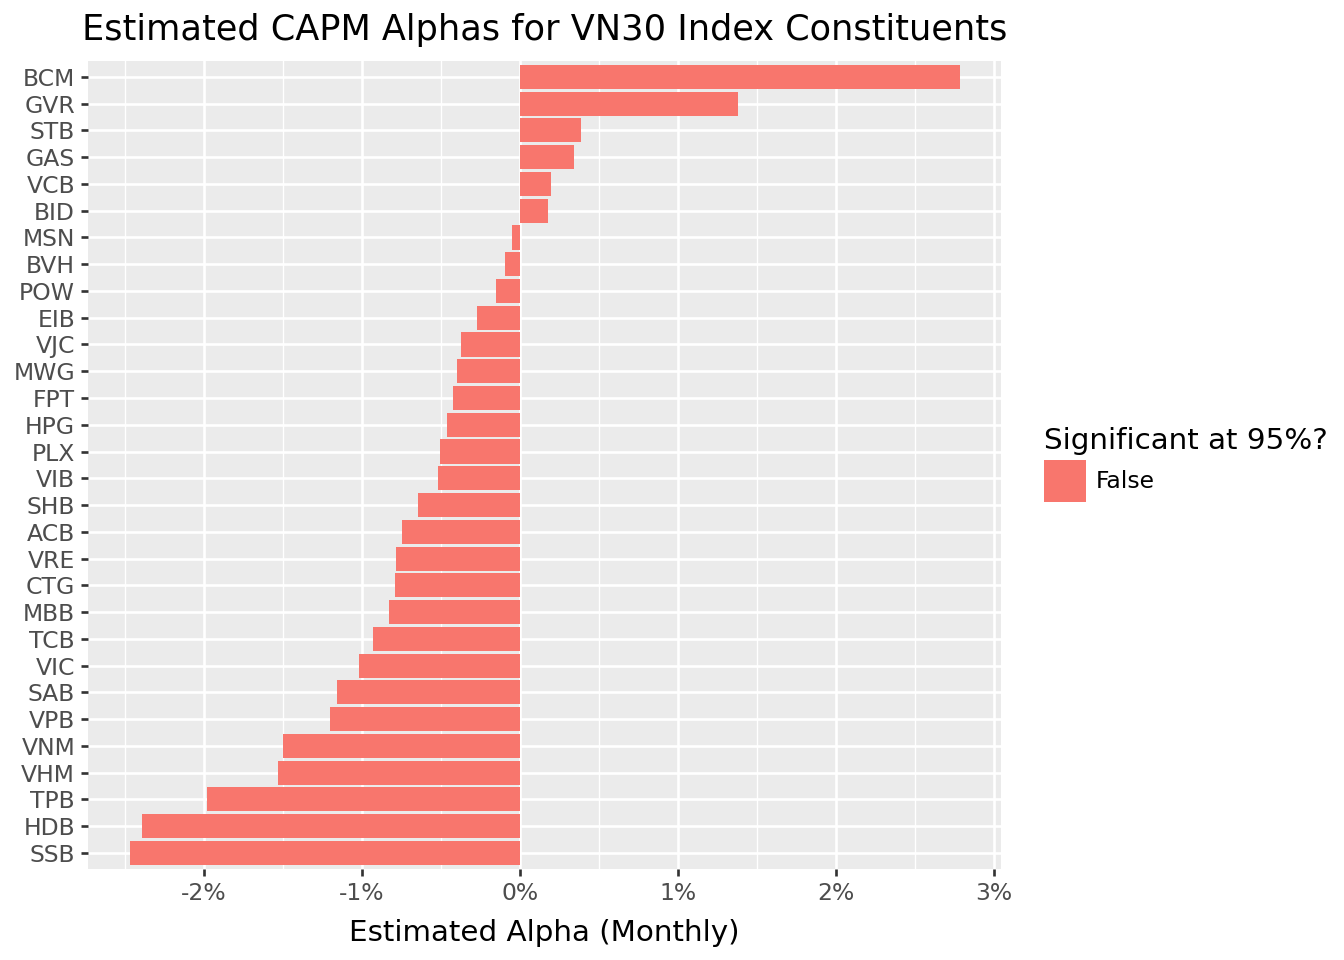

In [16]:
#| label: fig-305
#| fig-cap: Estimated CAPM alphas for VN30 index constituents. Color indicates statistical significance at the 95% confidence level. Most alphas are statistically indistinguishable from zero, consistent with CAPM predictions.
#| fig-alt: 'Title: Estimated CAPM alphas for VN30 index constituents. The figure shows a bar chart with estimated alphas and indicates whether each estimate is statistically significant at 95%.'

alphas = (capm_results
    .query("coefficient == 'alpha'")
    .assign(is_significant=lambda x: np.abs(x["t_statistic"]) >= 1.96)
)

alphas["symbol"] = pd.Categorical(
    alphas["symbol"],
    categories=alphas.sort_values("estimate")["symbol"],
    ordered=True
)

alphas_figure = (
    ggplot(alphas, aes(y="estimate", x="symbol", fill="is_significant"))
    + geom_col()
    + scale_y_continuous(labels=percent_format())
    + coord_flip()
    + labs(
        x="", 
        y="Estimated Alpha (Monthly)", 
        fill="Significant at 95%?",
        title="Estimated CAPM Alphas for VN30 Index Constituents"
    )
)

alphas_figure.show()